In [40]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
pitching_df = pd.read_csv("db/pitching4.csv")

In [3]:
pitching_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
playerID      253 non-null object
G             253 non-null int64
W             253 non-null int64
SO            253 non-null int64
PCT           253 non-null float64
ERA           253 non-null float64
WHIP          253 non-null float64
HOF_member    253 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 15.9+ KB


In [4]:
X = pitching_df[["G","W", "SO","PCT","ERA"]]
y = pitching_df["HOF_member"]

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=26)


In [19]:
# Normalize the data.  Here, we are using StandardScaler
X_scaler = StandardScaler().fit(X_train)
#X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



C:\Users\Laptop 1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [20]:
model = LogisticRegression(C=1.0, penalty='l2', random_state=27, solver="saga", max_iter=5000)

In [ ]:
X_train_scaled.shape

In [ ]:
X_test_scaled.shape

In [21]:
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=27, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import mean_squared_error

In [22]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}") 


MSE: 0.140625, R2: 0.859375


If curious about which players in the test split were predicted for what, we can take these two outputs, import and pair them

In [33]:
X_test["predictions"] = predictions
X_test.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,G,W,SO,PCT,ERA,predictions
116,201,79,886,0.537415,2.874499,0
221,259,102,1359,0.520408,3.102977,0
50,194,74,560,0.496644,2.559990,0
164,171,76,820,0.612903,2.838046,0
215,222,108,817,0.600000,3.054580,0


In [ ]:
X_test.to_csv("db/Xtest.csv", index=False, header=True)

Here's what we've been waiting for:  Let's make Hall-Of-Fame predictions for more recent and current players.

In [23]:
recent_df = pd.read_csv("db/pitching_recent.csv")

In [24]:
recent_players = recent_df["playerID"]
X_recent = recent_df[["G","W","SO","PCT","ERA"]]


In [25]:
X_recent_scaled = X_scaler.transform(X_recent)

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [26]:
predictions_recent = model.predict(X_recent_scaled)

In [27]:
X_recent["predictions"] = predictions_recent
X_recent["playerID"] = recent_players

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
people_df = pd.read_csv("db/people.csv")

In [29]:
players_df = people_df[["playerID","nameFirst","nameLast"]]
players_df["nameFull"] = players_df["nameFirst"]+' '+players_df["nameLast"]
players_df.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,playerID,nameFirst,nameLast,nameFull
0,aardsda01,David,Aardsma,David Aardsma
1,aaronha01,Hank,Aaron,Hank Aaron
2,aaronto01,Tommie,Aaron,Tommie Aaron
3,aasedo01,Don,Aase,Don Aase
4,abadan01,Andy,Abad,Andy Abad


In [30]:
X_recent.to_csv("db/Xrecent.csv", index=False, header=True)

In [31]:
Predicted_for_HOF = X_recent.loc[X_recent["predictions"] == 1, :]
Predicted_for_HOF = pd.merge(Predicted_for_HOF, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
display(Predicted_for_HOF)

,G,W,SO,PCT,ERA,predictions,playerID,nameFull
0,211,98,1445,0.666667,2.481258,1,kershcl01,Clayton Kershaw
1,208,99,1678,0.626582,2.911383,1,salech01,Chris Sale
2,217,117,1234,0.642857,2.986345,1,wainwad01,Adam Wainwright


In [52]:
Predicted_for_HOF = pd.merge(X_recent, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
del Predicted_for_HOF["playerID"]
Predicted_for_HOF.to_csv("pitching picks.csv", index=False, header=True)

In [32]:
X_test

,G,W,SO,PCT,ERA
116,201,79,886,0.537415,2.874499
221,259,102,1359,0.520408,3.102977
50,194,74,560,0.496644,2.559990
164,171,76,820,0.612903,2.838046
215,222,108,817,0.600000,3.054580
31,264,94,1077,0.540230,2.811883
104,196,83,522,0.580420,3.750407
192,288,125,869,0.570776,3.555431
45,259,73,719,0.467949,2.933637
120,262,117,933,0.557143,3.335618


In [34]:
X_graph = pd.concat([X_test, X_recent])
X_graph.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ERA,G,PCT,SO,W,playerID,predictions
116,2.874499,201,0.537415,886,79,NaN,0
221,3.102977,259,0.520408,1359,102,NaN,0
50,2.559990,194,0.496644,560,74,NaN,0
164,2.838046,171,0.612903,820,76,NaN,0
215,3.054580,222,0.600000,817,108,NaN,0


In [35]:
X_graph_grouped = X_graph.groupby(["predictions"],as_index=False).mean()
X_graph_grouped

,predictions,ERA,G,PCT,SO,W
0,0,3.405747,215.527473,0.562366,850.351648,86.571429
1,1,2.790766,232.714286,0.609805,1494.000000,114.571429


In [36]:
# Need to rescale the averages so they don't get swamped by the counting stats
X_graph_grouped["ERA"] = X_graph_grouped["ERA"] * 100
X_graph_grouped["PCT"] = X_graph_grouped["PCT"] * 1000

G      215.527473
SO     850.351648
W       86.571429
ERA    340.574740
PCT    562.366386
Name: 0, dtype: float64

<IPython.core.display.Javascript object>


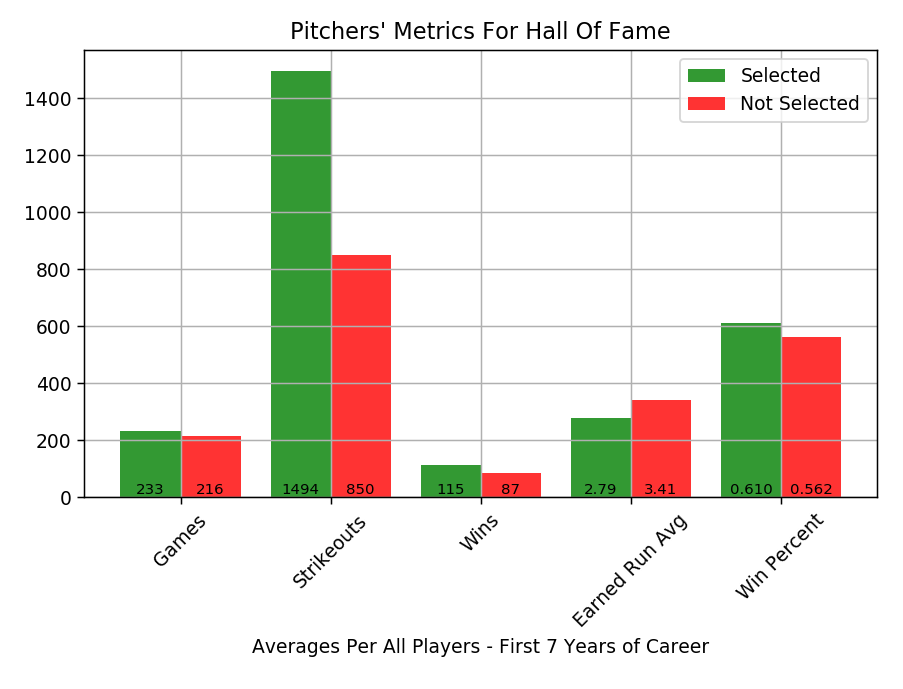

In [50]:
n_groups = 5
means_no  = X_graph_grouped.iloc[0, [2, 4, 5, 1, 3]]
means_yes = X_graph_grouped.iloc[1, [2, 4, 5, 1, 3]]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8

rects1 = plt.bar(index, means_yes, bar_width,
alpha=opacity,
color='g',
label='Selected')

rects2 = plt.bar(index + bar_width, means_no, bar_width,
alpha=opacity,
color='r',
label='Not Selected')

plt.xlabel('Averages Per All Players - First 7 Years of Career')
plt.title("Pitchers' Metrics For Hall Of Fame")
plt.xticks(index + (bar_width/2), ('Games', 'Strikeouts', 'Wins', 'Earned Run Avg', 'Win Percent' ), rotation=45)
plt.grid()
plt.legend()

# Use functions to label the percentages of changes
def valuelabel(rects, ptext):

    x = 0
    for rect in rects:
        height = rect.get_height()
        if height > 10:
            ypos = 2
        elif height > 0:
            ypos = height + 1   # not enough room in the bar, so display just over it
        elif height > -10:
            ypos = height - 5
        else:
            ypos = -6
            
        plt.text(rect.get_x() + rect.get_width() / 2, ypos, ptext[x], ha="center", va="bottom", fontsize=8)
        x += 1
 

# reverse the above rescaling so that we can show true values
means_yes[3] = means_yes[3] / 100
means_yes[4] = means_yes[4] / 1000

# Call function to implement value labeling
chgx = pd.Series(["{:.0f}".format(means_yes[0]),
                  "{:.0f}".format(means_yes[1]),
                  "{:.0f}".format(means_yes[2]),
                  "{:.2f}".format(means_yes[3]),
                  "{:.3f}".format(means_yes[4]),
                 ])
valuelabel(rects1, chgx)

means_no[3] = means_no[3] / 100
means_no[4] = means_no[4] / 1000

chgx = pd.Series(["{:.0f}".format(means_no[0]),
                  "{:.0f}".format(means_no[1]),
                  "{:.0f}".format(means_no[2]),
                  "{:.2f}".format(means_no[3]),
                  "{:.3f}".format(means_no[4]),
                 ])

valuelabel(rects2, chgx)

plt.tight_layout()

In [53]:
# Save the Figure
plt.savefig("pitchers_metrics.png", bbox_inches="tight")